# 📊 Pipeline de Clustering Basado en Densidad


## 🎯 Introducción

Este notebook ejecuta un pipeline de clustering basado en densidad utilizando **DBSCAN** y **HDBSCAN** sobre el dataset *Wine*.


In [1]:
!pip install scikit-learn matplotlib seaborn pandas

In [2]:

# ✅ Configuración del entorno
import pandas as pd
import os
from sklearn.decomposition import PCA


In [3]:

# ✅ Configuración del entorno
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path


# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# Ir desde notebooks/ hacia la raíz del proyecto
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print("project_root:", project_root)
from src.utils import cargar_dataset

from src.visualizador import graficar_clusters, graficar_tsne
from src.evaluador import evaluar_clusterings
from src.modelos import aplicar_dbscan, aplicar_hdbscan

project_root: /home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo6Clase2MarcoParra


/tmp/ipykernel_344687/4186693350.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


🔹 Iniciando pipeline Clustering Basado en Densidad...
📥 Cargando dataset 'wine'...
🔍 Verificando NaN iniciales: 0
✅ Verificación final: 0 NaNs restantes
⚠️ Filas eliminadas por outliers: 17
✅ Dataset cargado completo: 161 filas, 13 features
✅ Dataset cargado y normalizado

🔍 Aplicando PCA...
📊 Varianza explicada: 64.29%

📈 Visualizando PCA 2D:


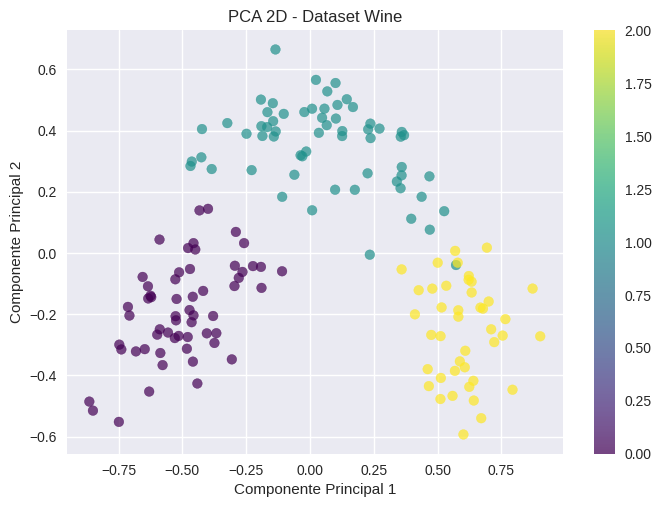


## 🔍 Análisis DBSCAN

📌 Configuración: eps=0.3, min_samples=3


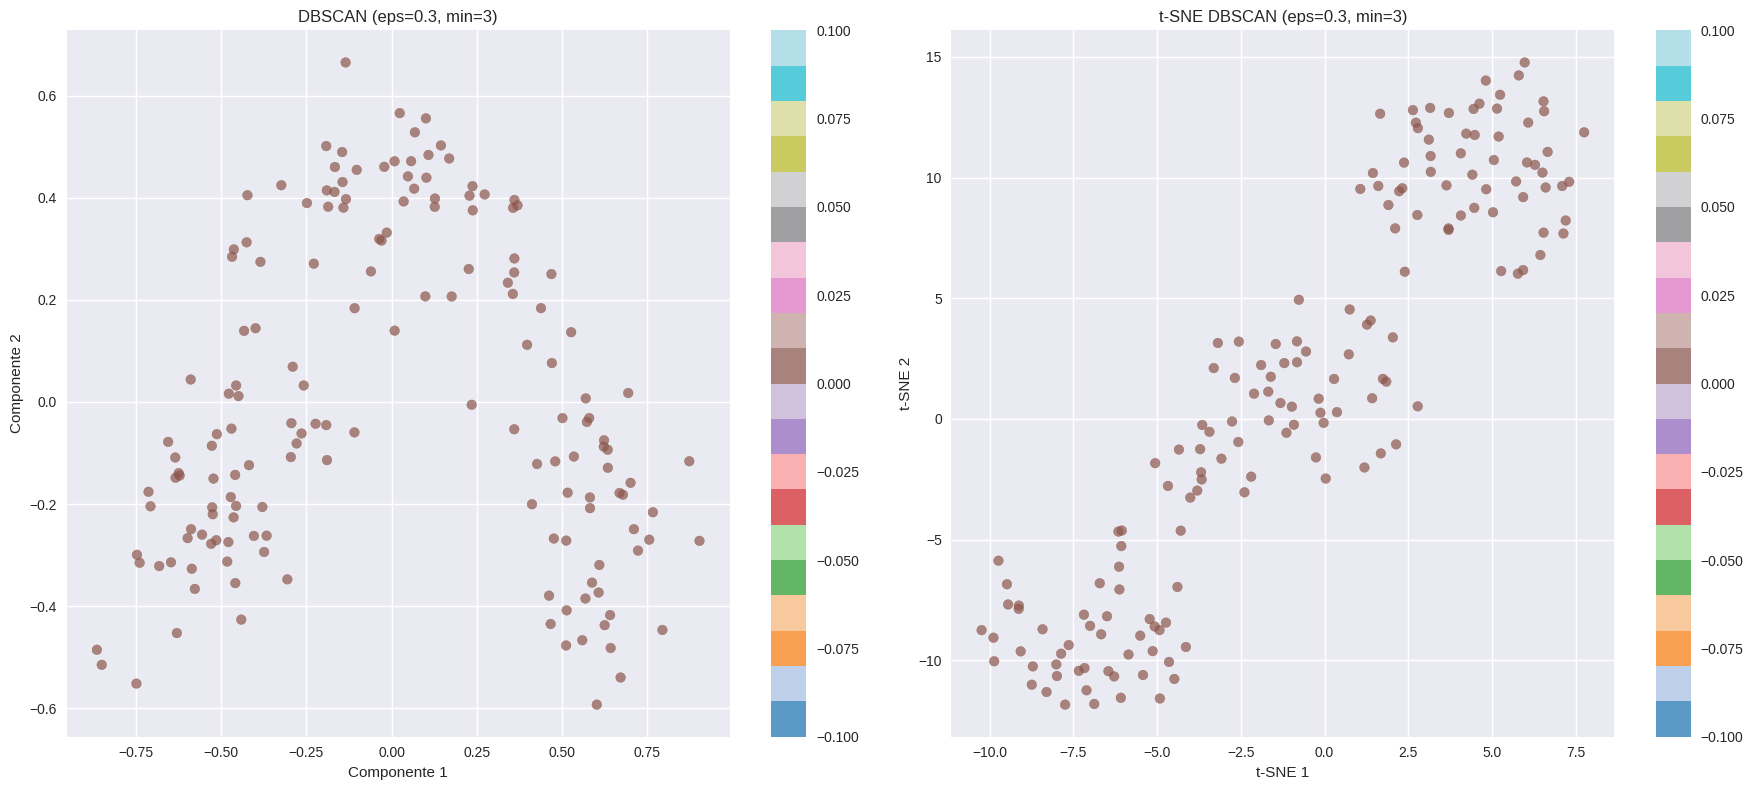

,modelo,eps,min_samples,n_clusters,silhouette,davies_bouldin
0,DBSCAN,0.3,3,1,None,None



📌 Configuración: eps=0.3, min_samples=5


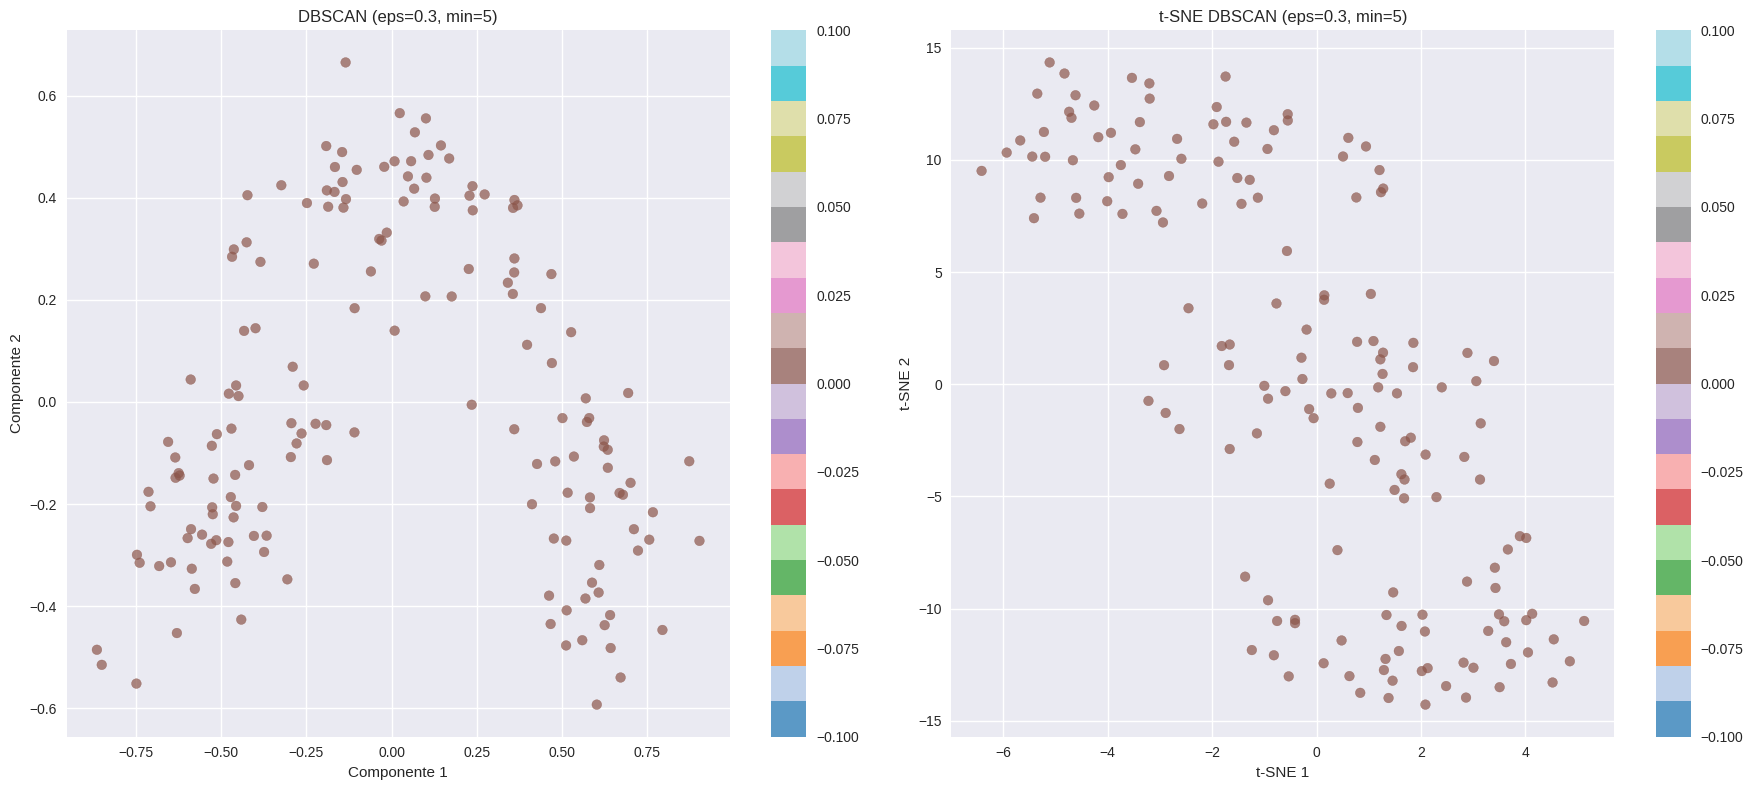

,modelo,eps,min_samples,n_clusters,silhouette,davies_bouldin
0,DBSCAN,0.3,5,1,None,None



📌 Configuración: eps=0.3, min_samples=10


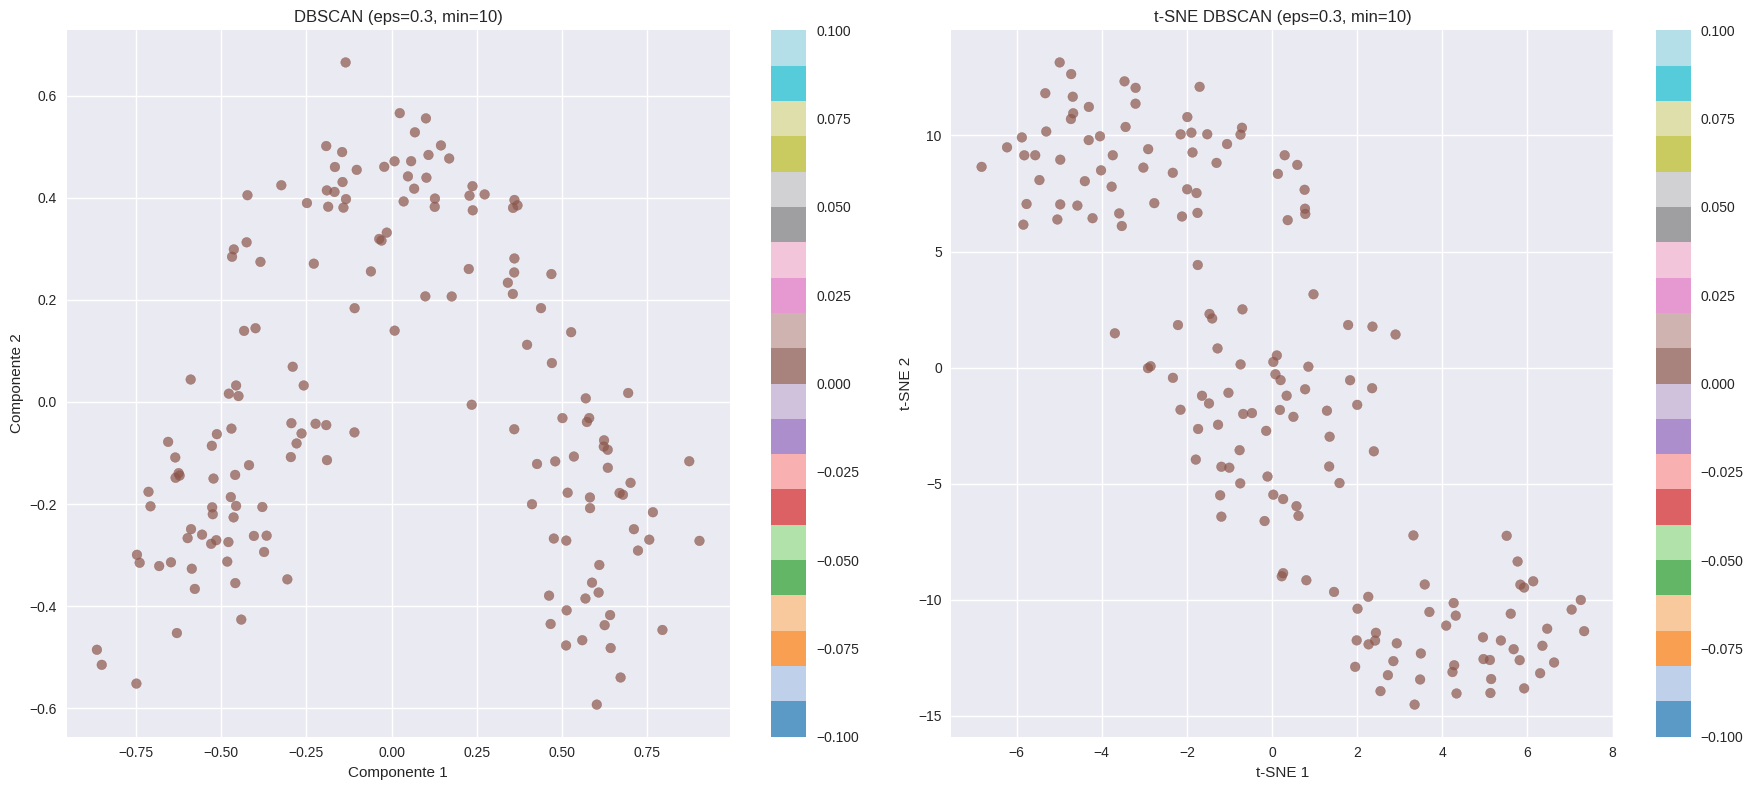

,modelo,eps,min_samples,n_clusters,silhouette,davies_bouldin
0,DBSCAN,0.3,10,1,None,None



📌 Configuración: eps=0.5, min_samples=3


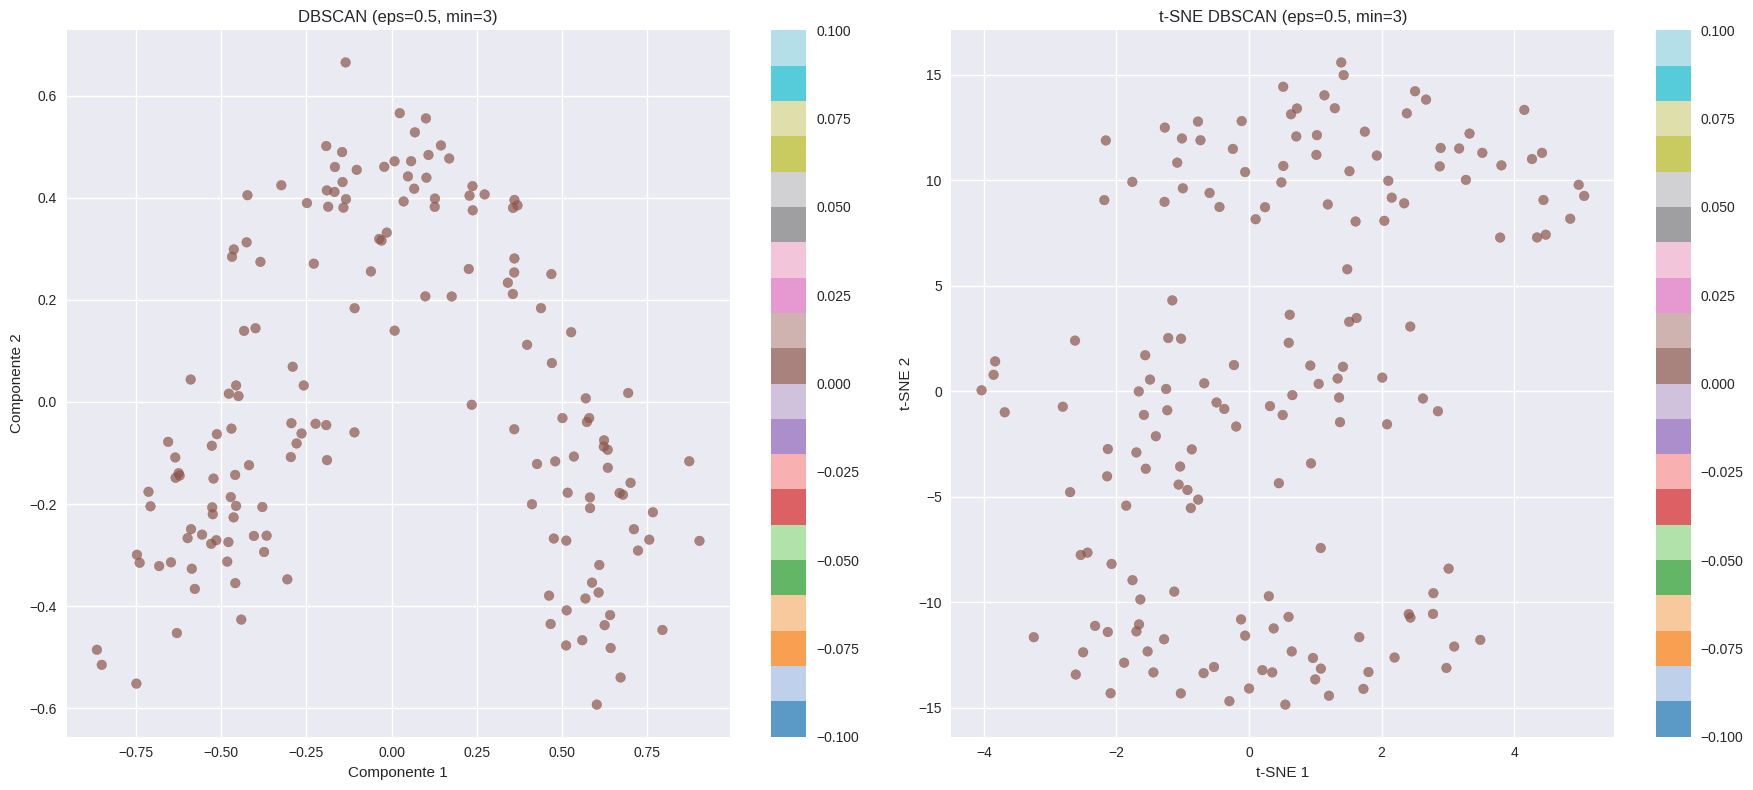

,modelo,eps,min_samples,n_clusters,silhouette,davies_bouldin
0,DBSCAN,0.5,3,1,None,None



📌 Configuración: eps=0.5, min_samples=5


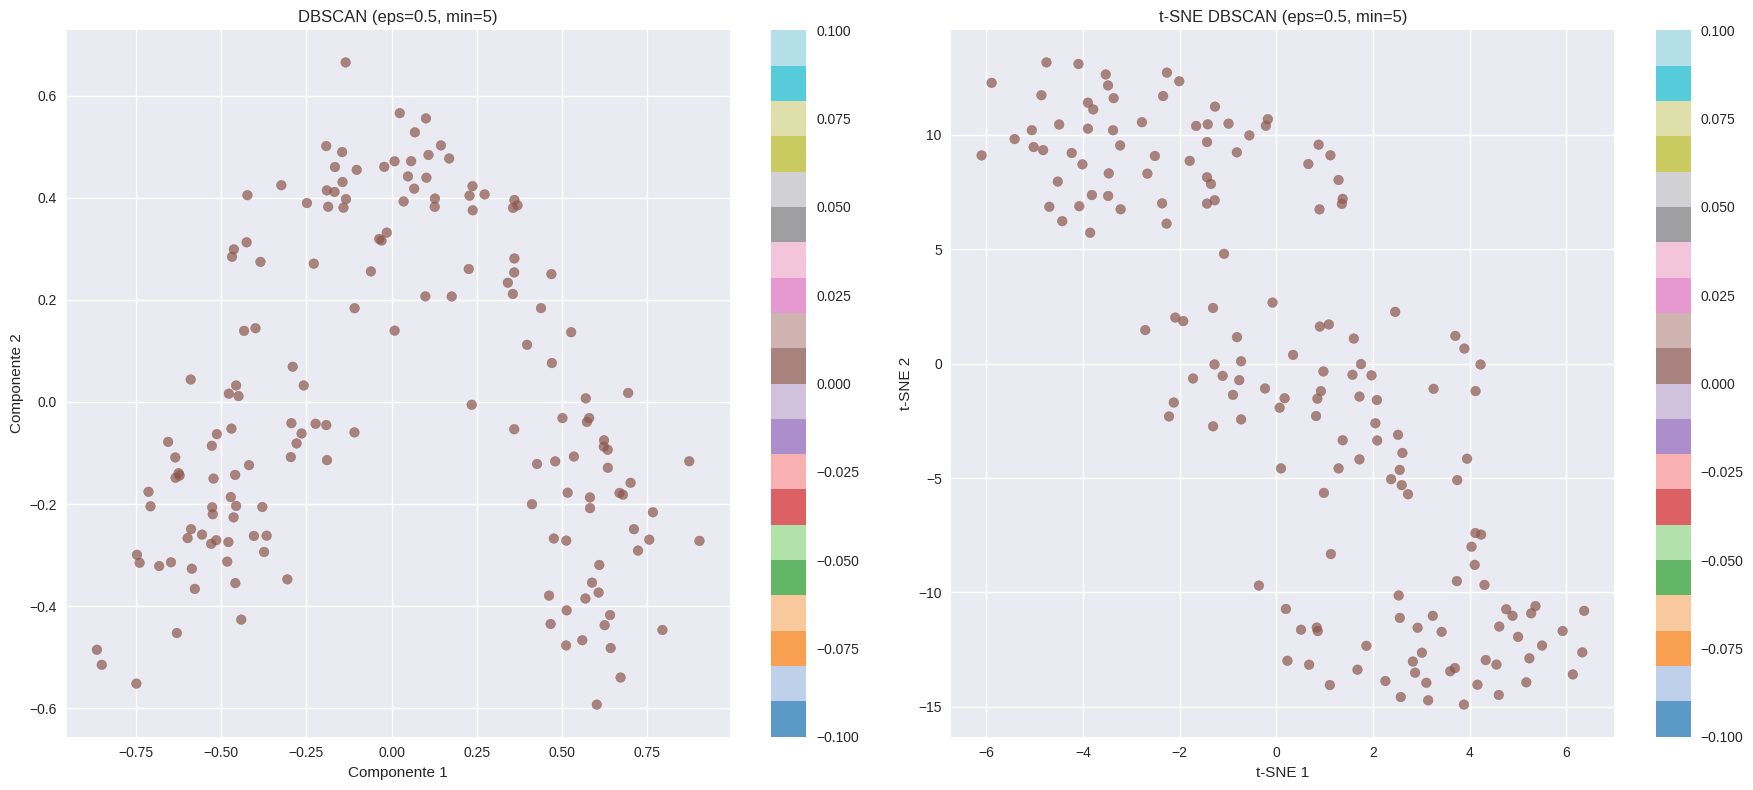

,modelo,eps,min_samples,n_clusters,silhouette,davies_bouldin
0,DBSCAN,0.5,5,1,None,None



📌 Configuración: eps=0.5, min_samples=10


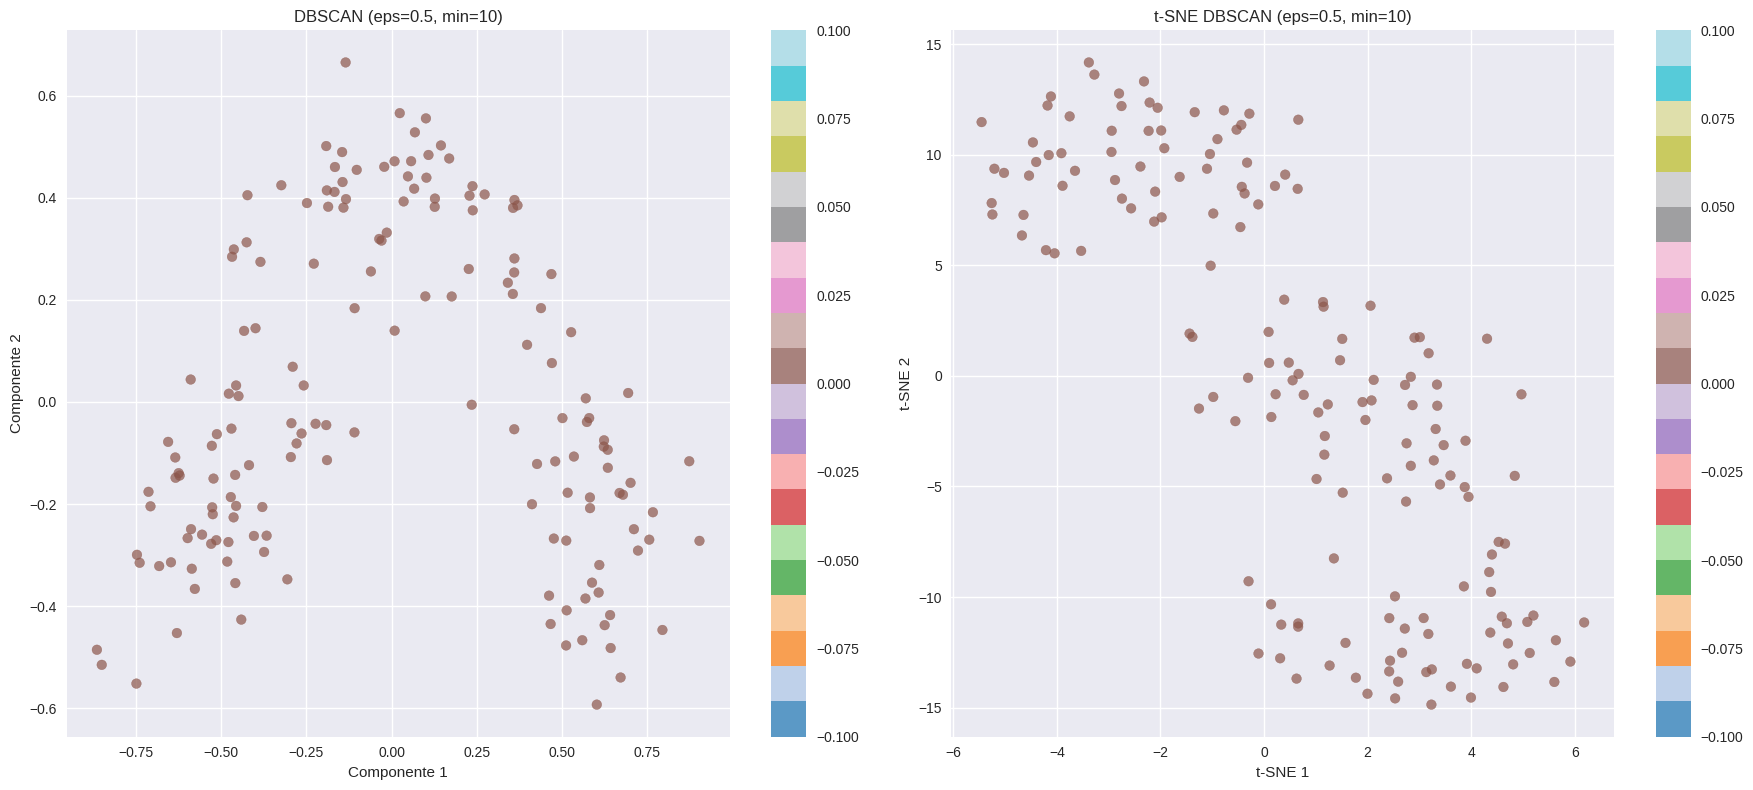

,modelo,eps,min_samples,n_clusters,silhouette,davies_bouldin
0,DBSCAN,0.5,10,1,None,None



📌 Configuración: eps=0.7, min_samples=3


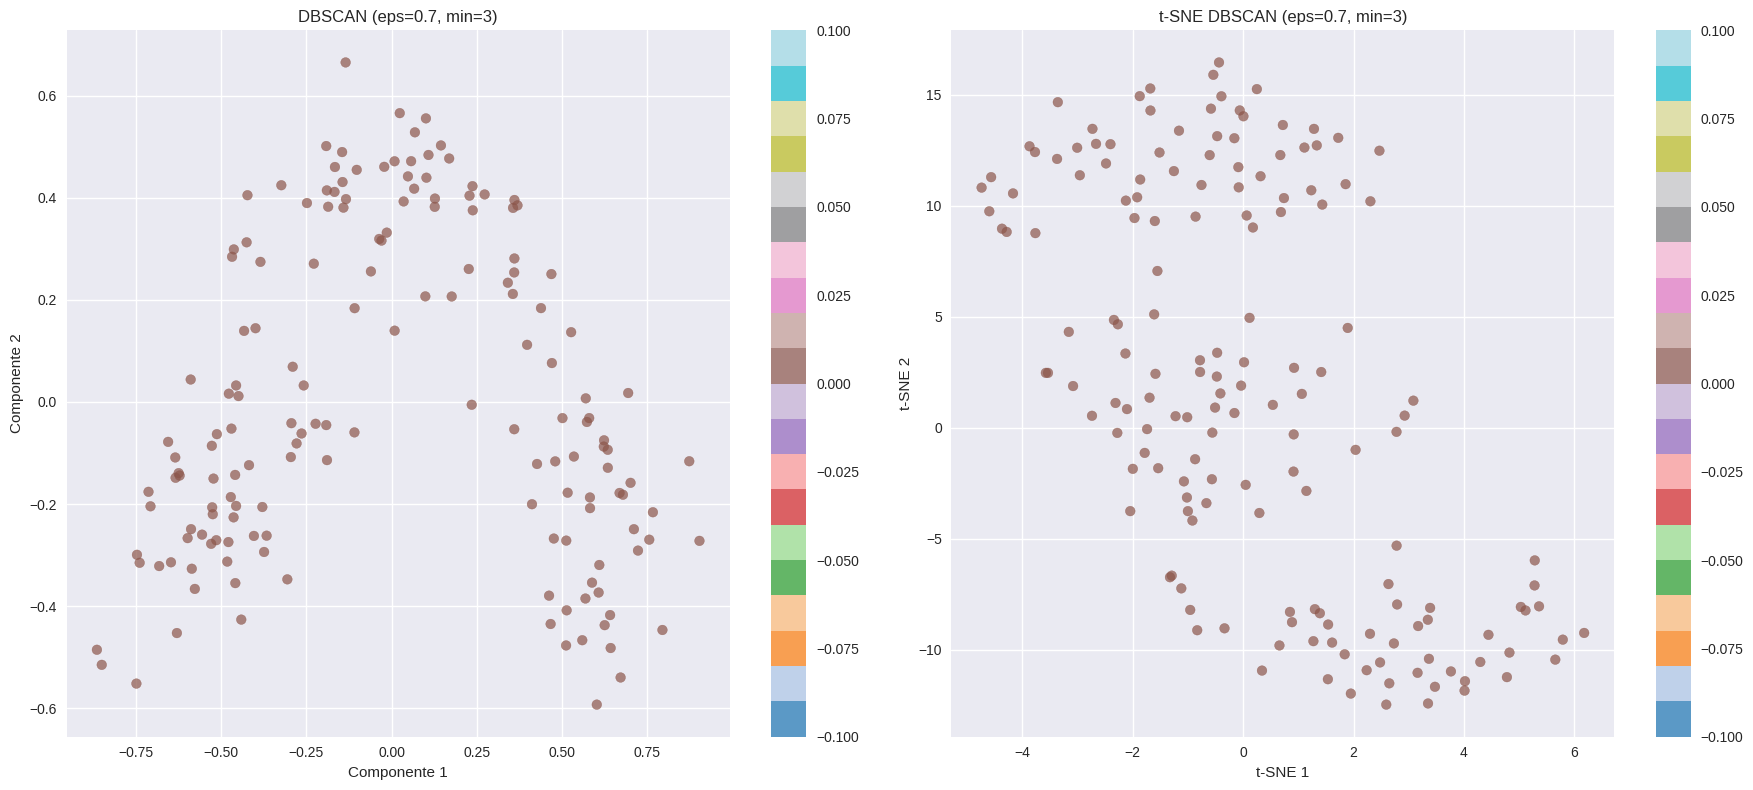

,modelo,eps,min_samples,n_clusters,silhouette,davies_bouldin
0,DBSCAN,0.7,3,1,None,None



📌 Configuración: eps=0.7, min_samples=5


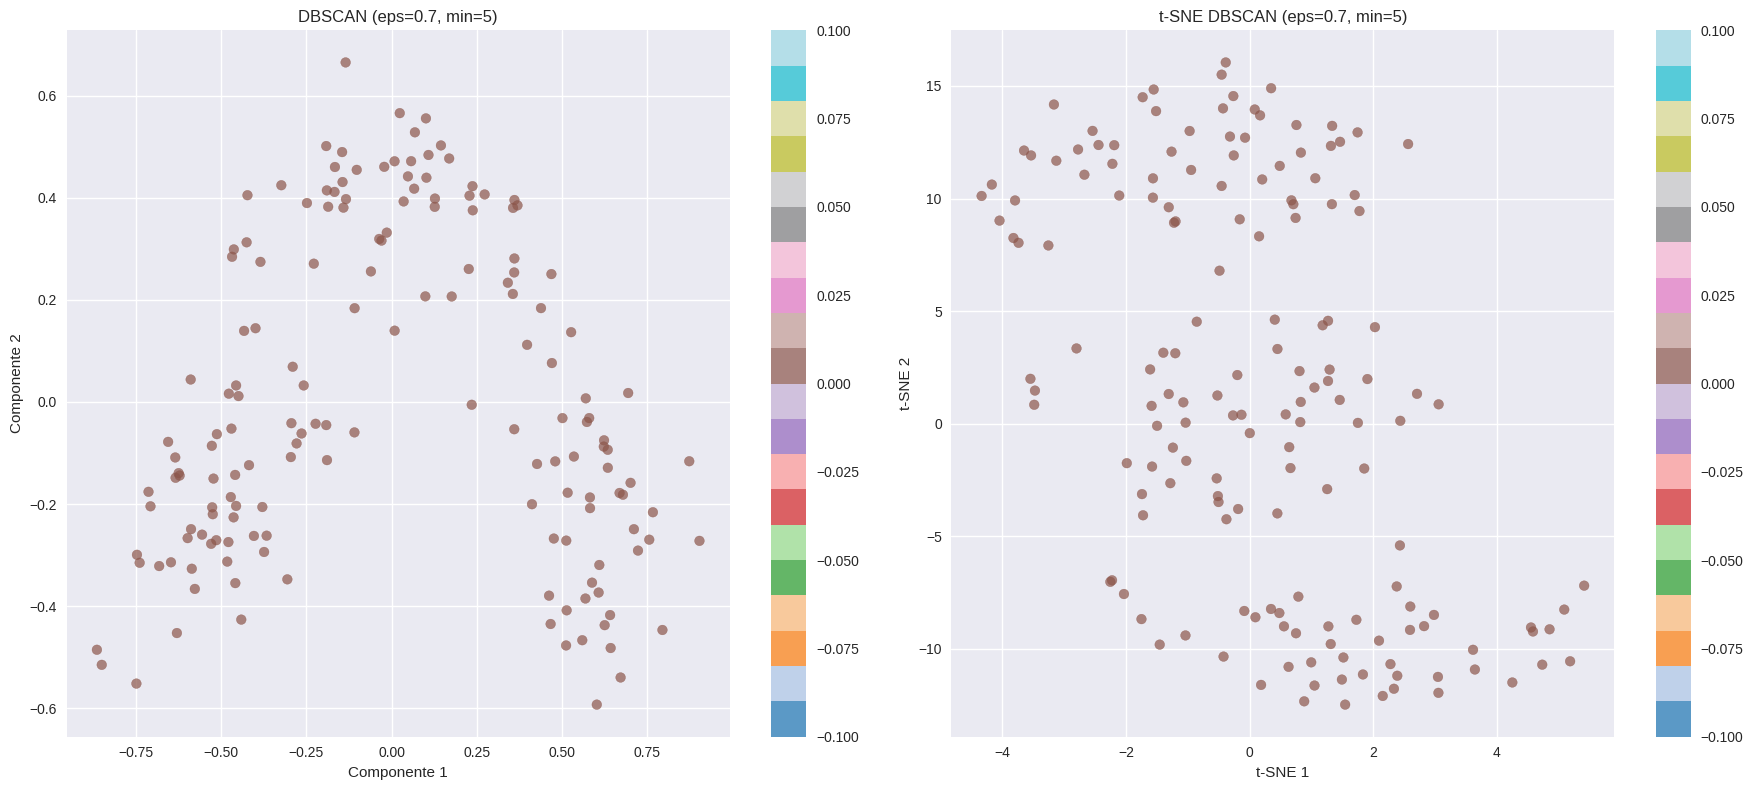

,modelo,eps,min_samples,n_clusters,silhouette,davies_bouldin
0,DBSCAN,0.7,5,1,None,None



📌 Configuración: eps=0.7, min_samples=10


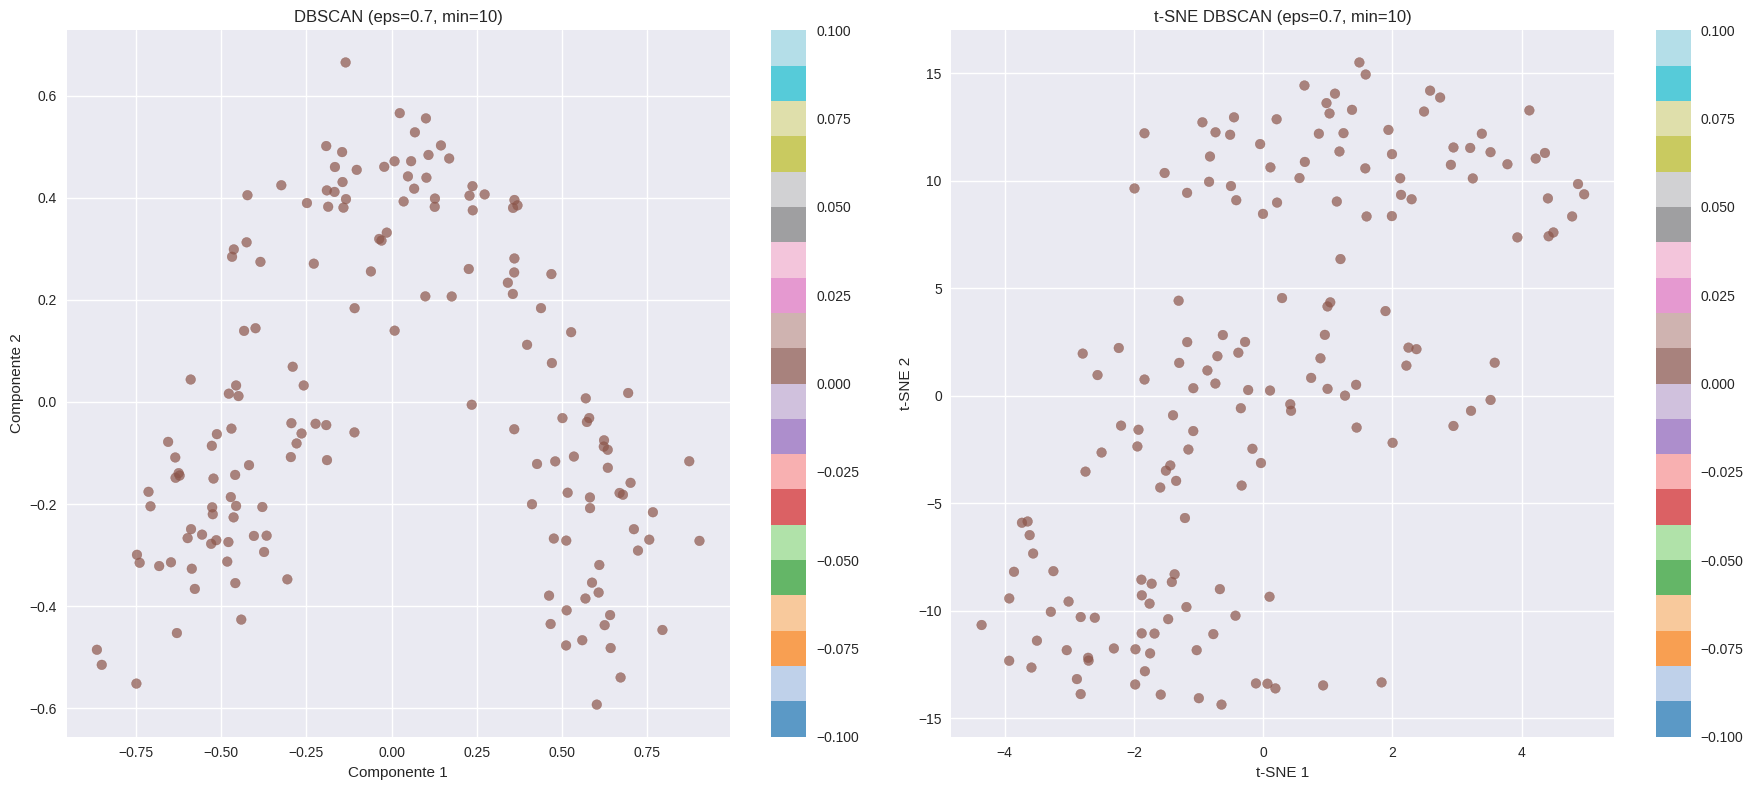

,modelo,eps,min_samples,n_clusters,silhouette,davies_bouldin
0,DBSCAN,0.7,10,1,None,None



📊 Resumen DBSCAN:


,modelo,eps,min_samples,n_clusters,silhouette,davies_bouldin
0,DBSCAN,0.3,3,1,None,None
1,DBSCAN,0.3,5,1,None,None
2,DBSCAN,0.3,10,1,None,None
3,DBSCAN,0.5,3,1,None,None
4,DBSCAN,0.5,5,1,None,None



## 🌳 Análisis HDBSCAN

📌 Configuración: min_cluster_size=5
🔧 Ejecutando HDBSCAN (min_cluster_size=5)...


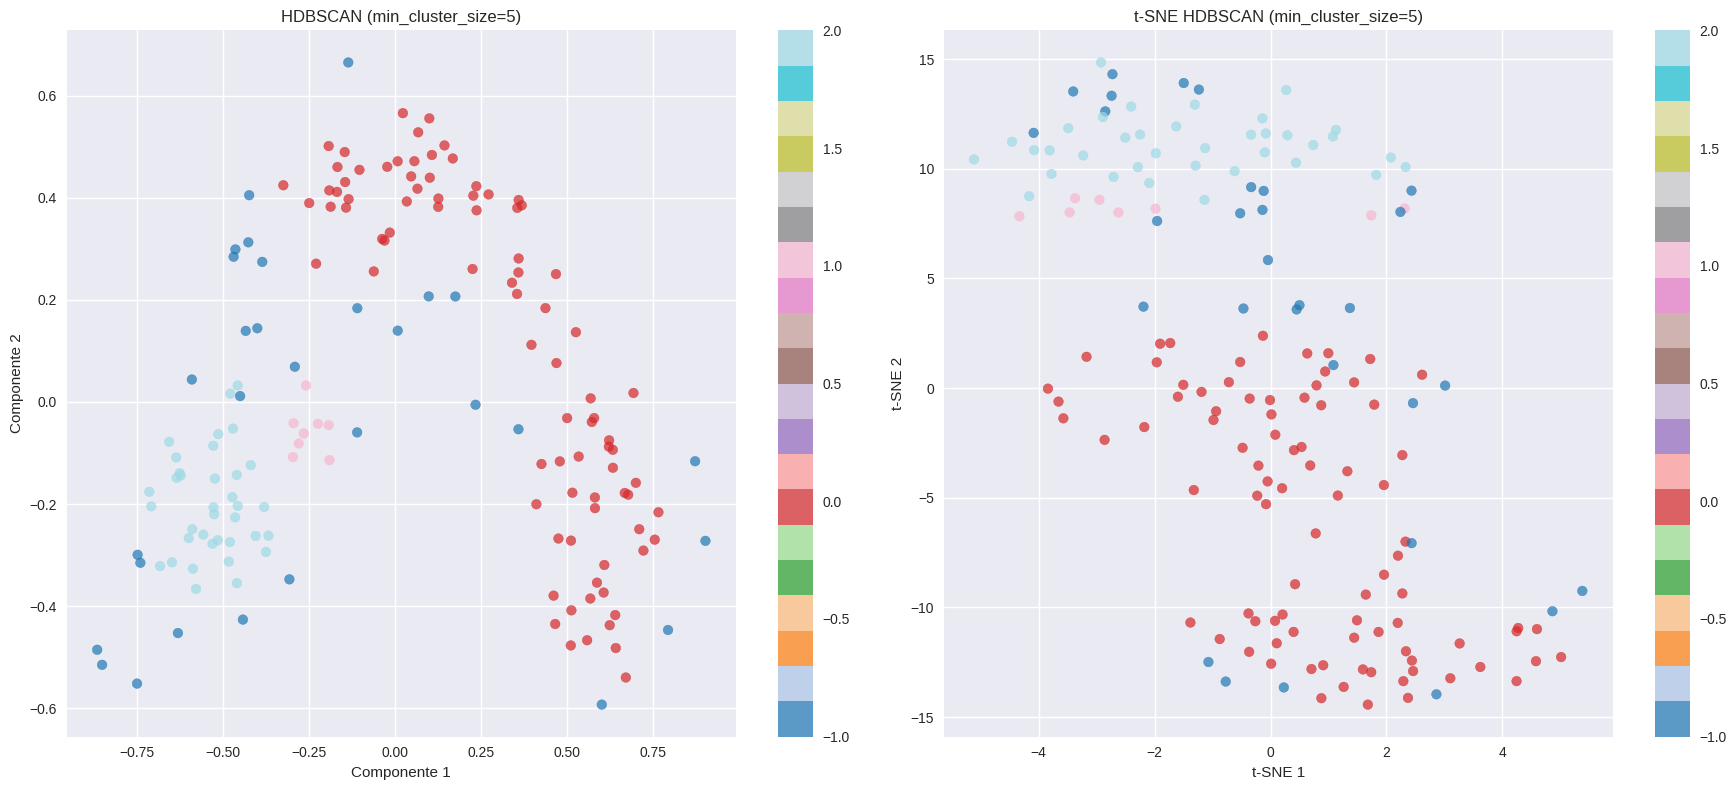

,modelo,min_cluster_size,n_clusters,silhouette,davies_bouldin
0,HDBSCAN,5,3,0.15869,6.587366



📌 Configuración: min_cluster_size=10
🔧 Ejecutando HDBSCAN (min_cluster_size=10)...


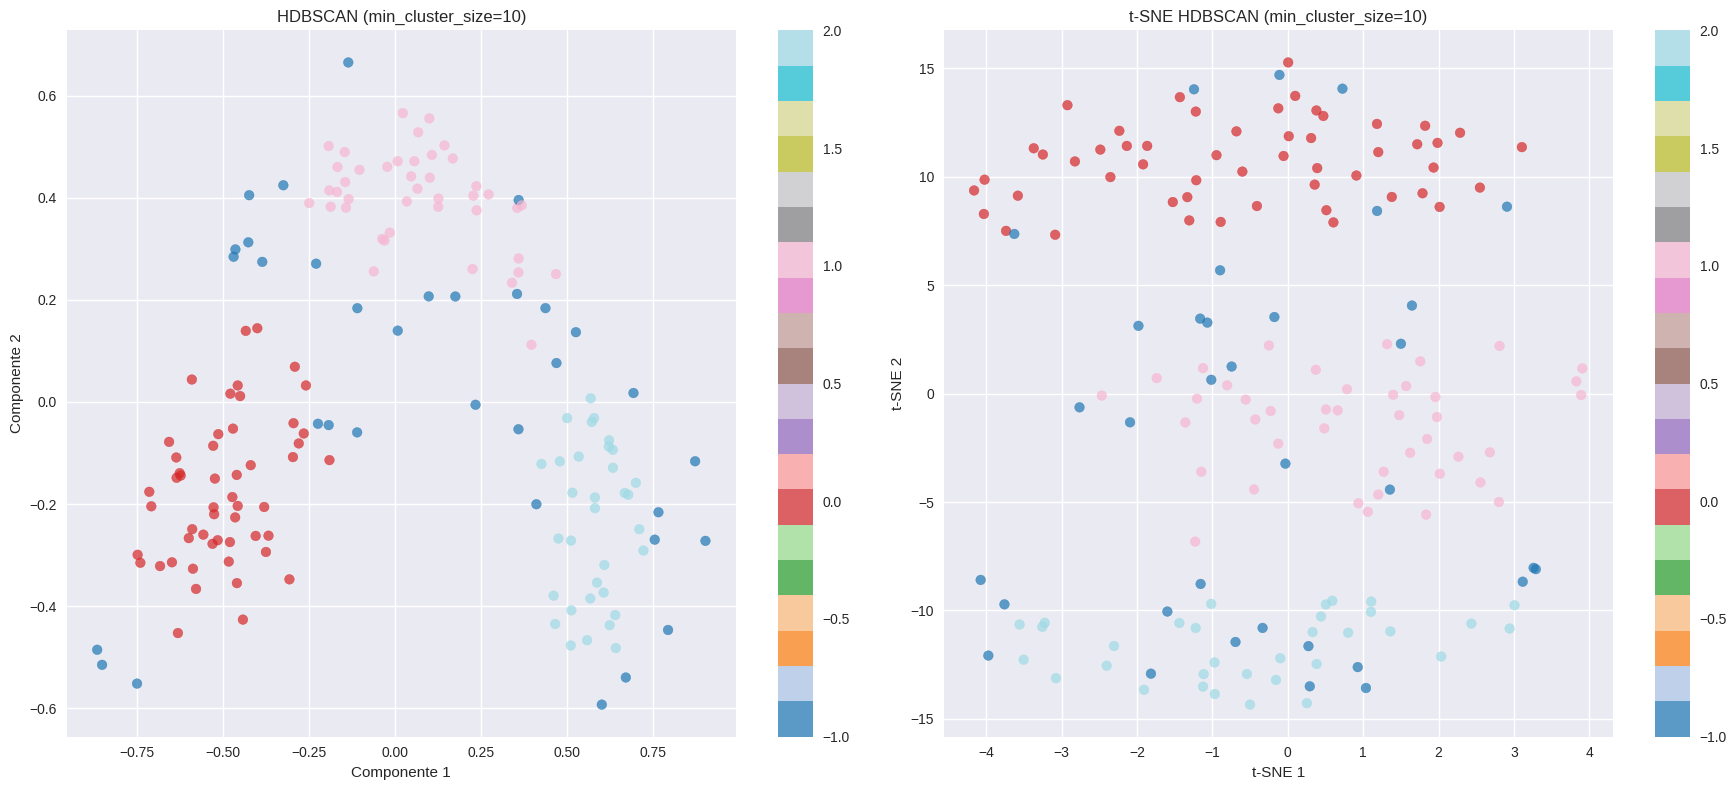

,modelo,min_cluster_size,n_clusters,silhouette,davies_bouldin
0,HDBSCAN,10,3,0.409845,1.550071



📊 Resumen HDBSCAN:


,modelo,min_cluster_size,n_clusters,silhouette,davies_bouldin
0,HDBSCAN,5,3,0.158690,6.587366
1,HDBSCAN,10,3,0.409845,1.550071


In [6]:
# Configuración inicial para mostrar gráficos inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn')

# 🚀 Pipeline principal mejorado
print("🔹 Iniciando pipeline Clustering Basado en Densidad...")

# 1. Carga y preparación de datos
X, y = cargar_dataset("wine", usar_minmax=True)
print("✅ Dataset cargado y normalizado")

# 2. Reducción de dimensionalidad con PCA
print("\n🔍 Aplicando PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
varianza_total = pca.explained_variance_ratio_.sum()
print(f"📊 Varianza explicada: {varianza_total:.2%}")

# Visualización PCA
print("\n📈 Visualizando PCA 2D:")
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
ax.set_title("PCA 2D - Dataset Wine")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
plt.colorbar(scatter)
plt.show()

# 3. Análisis DBSCAN
print("\n## 🔍 Análisis DBSCAN")
resultados_dbscan = []

for eps in [0.3, 0.5, 0.7]:
    for min_samples in [3, 5, 10]:
        print(f"\n📌 Configuración: eps={eps}, min_samples={min_samples}")
        
        # Aplicar DBSCAN
        etiquetas = aplicar_dbscan(X_pca, eps=eps, min_samples=min_samples)
        
        # Visualización clusters DBSCAN
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
        
        # Gráfico de clusters
        scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='tab20', alpha=0.7)
        ax1.set_title(f"DBSCAN (eps={eps}, min={min_samples})")
        ax1.set_xlabel("Componente 1")
        ax1.set_ylabel("Componente 2")
        plt.colorbar(scatter1, ax=ax1)
        
        # Gráfico t-SNE
        from sklearn.manifold import TSNE
        X_tsne = TSNE(n_components=2).fit_transform(X)
        scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=etiquetas, cmap='tab20', alpha=0.7)
        ax2.set_title(f"t-SNE DBSCAN (eps={eps}, min={min_samples})")
        ax2.set_xlabel("t-SNE 1")
        ax2.set_ylabel("t-SNE 2")
        plt.colorbar(scatter2, ax=ax2)
        
        plt.tight_layout()
        plt.show()
        
        # Evaluación y almacenamiento de resultados
        resultado = evaluar_clusterings(X, etiquetas, "DBSCAN", {"eps": eps, "min_samples": min_samples})
        resultados_dbscan.append(resultado)
        
        # Mostrar resultado actual
        display(pd.DataFrame([resultado]))

# Resumen DBSCAN
print("\n📊 Resumen DBSCAN:")
df_dbscan = pd.DataFrame(resultados_dbscan)
display(df_dbscan.head())

# 4. Análisis HDBSCAN
print("\n## 🌳 Análisis HDBSCAN")
resultados_hdbscan = []

for min_cluster_size in [5, 10]:
    print(f"\n📌 Configuración: min_cluster_size={min_cluster_size}")
    
    # Aplicar HDBSCAN
    etiquetas = aplicar_hdbscan(X_pca, min_cluster_size=min_cluster_size)
    
    # Visualización clusters HDBSCAN
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Gráfico de clusters
    scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='tab20', alpha=0.7)
    ax1.set_title(f"HDBSCAN (min_cluster_size={min_cluster_size})")
    ax1.set_xlabel("Componente 1")
    ax1.set_ylabel("Componente 2")
    plt.colorbar(scatter1, ax=ax1)
    
    # Gráfico t-SNE
    X_tsne = TSNE(n_components=2).fit_transform(X)
    scatter2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=etiquetas, cmap='tab20', alpha=0.7)
    ax2.set_title(f"t-SNE HDBSCAN (min_cluster_size={min_cluster_size})")
    ax2.set_xlabel("t-SNE 1")
    ax2.set_ylabel("t-SNE 2")
    plt.colorbar(scatter2, ax=ax2)
    
    plt.tight_layout()
    plt.show()
    
    # Evaluación y almacenamiento de resultados
    resultado = evaluar_clusterings(X_pca, etiquetas, "HDBSCAN", {"min_cluster_size": min_cluster_size})
    resultados_hdbscan.append(resultado)
    
    # Mostrar resultado actual
    display(pd.DataFrame([resultado]))

# Resumen HDBSCAN
print("\n📊 Resumen HDBSCAN:")
df_hdbscan = pd.DataFrame(resultados_hdbscan)
display(df_hdbscan.head())


